<a href="https://colab.research.google.com/github/AnanyaSDhar/Student-Grade-Prediction/blob/main/Student_score_pred_(Linear_Regression%2C_SVM_and_Random_Forest_Regressor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
dfStudents = pd.read_csv('/content/student_data (1).csv', sep=',')
dfStudents.dataframeName = 'StudentsPerformance.csv'

In [4]:
rows, cols = dfStudents.shape
print(f'{rows} observaciones y {cols} características')

395 observaciones y 34 características


school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

paid - extra paid classes within the course subject (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)


health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [5]:
dfStudents.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,Creativity,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,10,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,7,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,6,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,10,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,11,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,9,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,7,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,14,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,14,15,15


In [7]:
df=dfStudents.drop(['Dalc','Walc','romantic','Mjob','Fjob','reason','age','guardian','nursery','Pstatus','famsize','Creativity','famsup','schoolsup'], axis=1)

In [8]:
df.head(5)

,school,sex,address,Medu,Fedu,traveltime,studytime,failures,paid,activities,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
0,GP,F,U,4,4,2,2,0,no,no,yes,no,4,3,4,3,6,5,6,6
1,GP,F,U,1,1,1,2,0,no,no,yes,yes,5,3,3,3,4,5,5,6
2,GP,F,U,1,1,1,2,3,yes,no,yes,yes,4,3,2,3,10,7,8,10
3,GP,F,U,4,2,1,3,0,yes,yes,yes,yes,3,2,2,5,2,15,14,15
4,GP,F,U,3,3,1,2,0,yes,no,yes,no,4,3,2,5,4,6,10,10


In [10]:
outcomes = df['G3']
features_raw = df.drop(['G3'],axis=1)

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2b8663df0>,
      dtype=object)

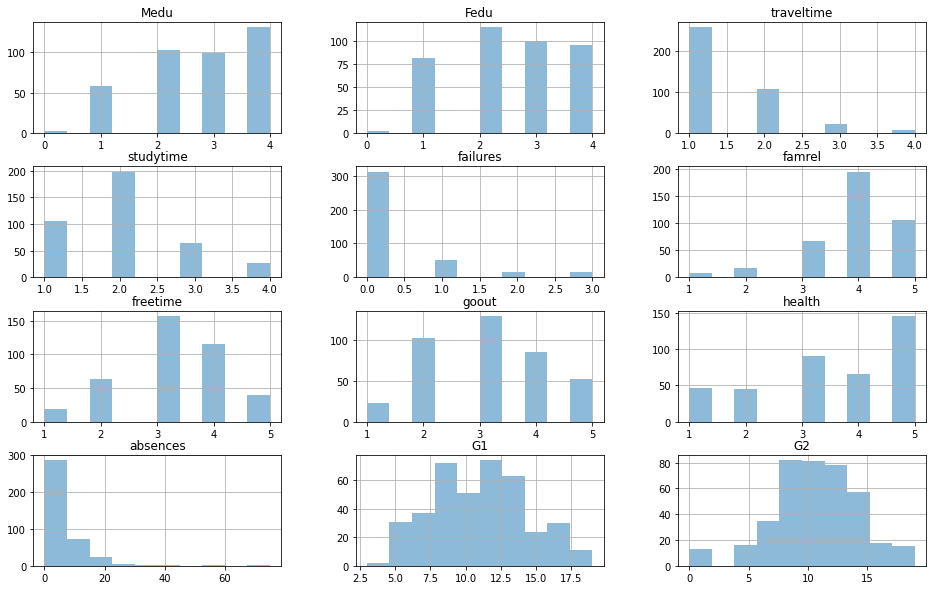

In [11]:
features_raw.hist(alpha=0.5, figsize=(16, 10))

In [12]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Cantidad de observaciones')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (columna {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

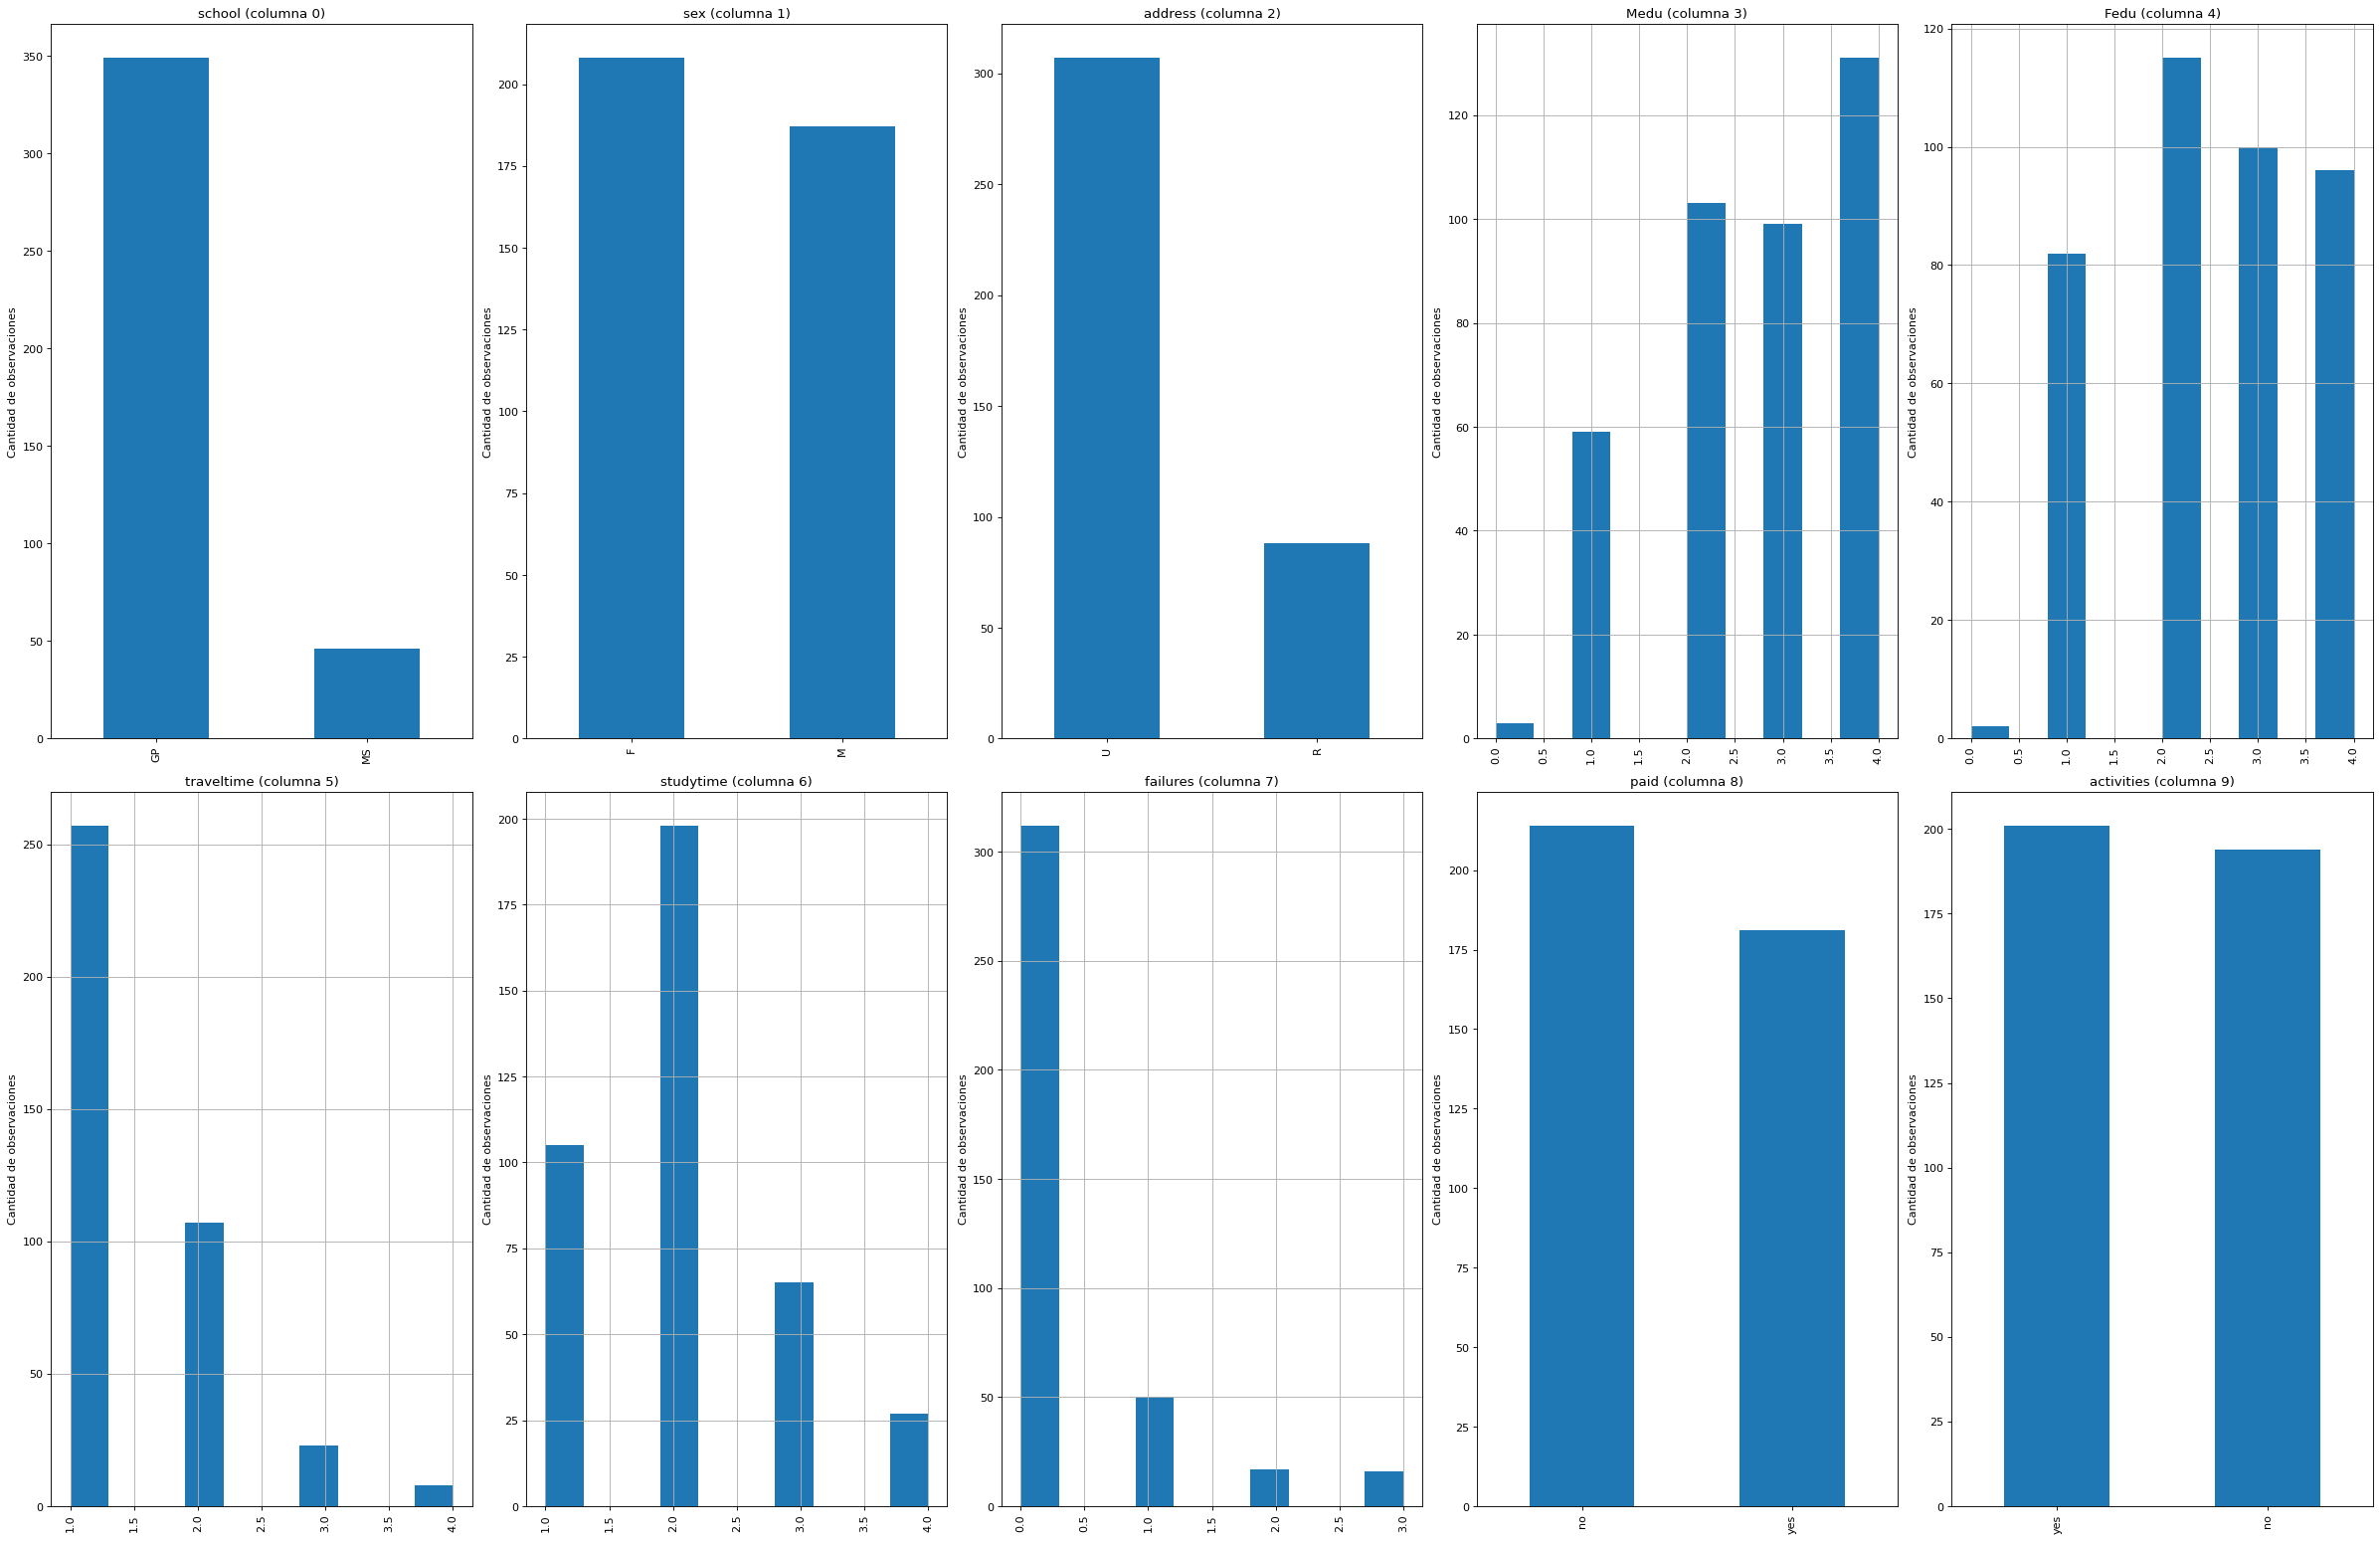

In [13]:
plotPerColumnDistribution(df, 10, 5)

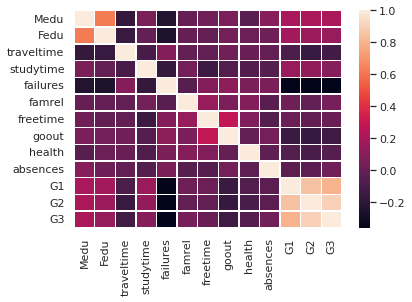

In [14]:
import seaborn as sns
sns.set()
sns.heatmap(df.corr(),linewidths=.5)

high correlations between the final grades and the grades given in first and second perion

# Data Pre-Processing

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','absences','G1','G2']
features_log_minmax_transform = pd.DataFrame(data=features_raw)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])

display(features_log_minmax_transform.head(n=5))

,school,sex,address,Medu,Fedu,traveltime,studytime,failures,paid,activities,higher,internet,famrel,freetime,goout,health,absences,G1,G2
0,GP,F,U,1.00,1.00,0.333333,0.333333,0.0,no,no,yes,no,0.75,0.50,0.75,0.5,0.080000,0.1250,0.315789
1,GP,F,U,0.25,0.25,0.000000,0.333333,0.0,no,no,yes,yes,1.00,0.50,0.50,0.5,0.053333,0.1250,0.263158
2,GP,F,U,0.25,0.25,0.000000,0.333333,1.0,yes,no,yes,yes,0.75,0.50,0.25,0.5,0.133333,0.2500,0.421053
3,GP,F,U,1.00,0.50,0.000000,0.666667,0.0,yes,yes,yes,yes,0.50,0.25,0.25,1.0,0.026667,0.7500,0.736842
4,GP,F,U,0.75,0.75,0.000000,0.333333,0.0,yes,no,yes,no,0.75,0.50,0.25,1.0,0.053333,0.1875,0.526316


This will ensure that each feature is treated equally when performing supervised learning algortihms on the data.

One Hot Encoding: Using Pandas encode non numerical values to numerical values

In [39]:
features_final = pd.get_dummies(features_log_minmax_transform)
encoded = list(features_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print(encoded)

26 total features after one-hot encoding
['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes']


In [41]:
pd.set_option('max_columns', None)
features_final.head(5)

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
0,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.5,0.080000,0.1250,0.315789,1,0,1,0,0,1,1,0,1,0,0,1,1,0
1,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.5,0.053333,0.1250,0.263158,1,0,1,0,0,1,1,0,1,0,0,1,0,1
2,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.5,0.133333,0.2500,0.421053,1,0,1,0,0,1,0,1,1,0,0,1,0,1
3,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,1.0,0.026667,0.7500,0.736842,1,0,1,0,0,1,0,1,0,1,0,1,0,1
4,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,1.0,0.053333,0.1875,0.526316,1,0,1,0,0,1,0,1,1,0,0,1,1,0


# Training the model


Train-test split


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_final,outcomes, test_size = 0.2, random_state=42)

print("Training set has {} samples".format(X_train.shape[0]))
print("Testing set has {} samples".format(X_test.shape[0]))

Training set has 316 samples
Testing set has 79 samples


**Linear** **Regression**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
Random_forest_regressor = RandomForestRegressor(n_estimators=10,random_state=0)
from sklearn.svm import SVC


In [45]:
def model_Creator_Tester(name,model,X_train,X_test,y_train,y_test):
    print(name)
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    from sklearn.metrics import mean_squared_error
    from math import sqrt
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_absolute_error

    train_rms = sqrt(mean_squared_error(y_train, y_train_pred))
    test_rms = sqrt(mean_squared_error(y_test, y_test_pred))
    print("The Root mean Squared Error for the training set is", train_rms)
    print("The Root mean Squared Error for the testing set is ", test_rms)


    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print('Mean Absolute Error for Training Set: %f' % mae_train)
    print('Mean Absolute Error for Testing Set: %f' % mae_test)
    return train_rms,test_rms,mae_train,mae_test;

In [50]:
names = ["Linear_Regression","SVM","Random Forest"]
models = [LinearRegression(),SVC(gamma='auto'),RandomForestRegressor(n_estimators=10,random_state=0)]
results = {}
for x,y in zip(names,models):
    print("\n",y,"\n")
    results[x]=model_Creator_Tester(x,y,X_train,X_test,y_train,y_test)


 LinearRegression() 

Linear_Regression
The Root mean Squared Error for the training set is 1.7720376686572021
The Root mean Squared Error for the testing set is  2.2080568670059333
Mean Absolute Error for Training Set: 1.135615
Mean Absolute Error for Testing Set: 1.395958

 SVC(gamma='auto') 

SVM
The Root mean Squared Error for the training set is 4.977798811990922
The Root mean Squared Error for the testing set is  5.181515344551513
Mean Absolute Error for Training Set: 3.613924
Mean Absolute Error for Testing Set: 4.265823

 RandomForestRegressor(n_estimators=10, random_state=0) 

Random Forest
The Root mean Squared Error for the training set is 0.7065919274225642
The Root mean Squared Error for the testing set is  1.9907380477309276
Mean Absolute Error for Training Set: 0.374367
Mean Absolute Error for Testing Set: 1.225316


In [51]:
def color_gradient ( val, beg_rgb, end_rgb, val_min = 0, val_max = 1):
    val_scale = (1.0 * val - val_min) / (val_max - val_min)
    return ( beg_rgb[0] + val_scale * (end_rgb[0] - beg_rgb[0]),
             beg_rgb[1] + val_scale * (end_rgb[1] - beg_rgb[1]),
             beg_rgb[2] + val_scale * (end_rgb[2] - beg_rgb[2]))

In [56]:
def print_results(results):
    titles = ["Root Mean Square for Training Set","Root Mean Square for Testing Set","Mean Absolute Error for Training Set","Mean Absolute Error for Testing Set"]
    fig = plt.figure(figsize=(10, 10))
    plt.rcParams.update({'font.size': 10})
    grad_beg, grad_end = ( 0.1, 0.1, 0.1), (1, 0.5, 0)
    for i,k in enumerate(results):
        tempVals = []
        for j in results.keys():
            #print(i,j)
            #print(results[j][i])
            tempVals.append(results[j][i])
        print(tempVals)
        print(results.keys())
        plt.subplot(len(titles)/2.,len(titles)/2.,1+i)
        col_list = [ color_gradient( val,
                                 grad_beg,
                                 grad_end,
                                 min( tempVals),
                                 max(tempVals)) for val in tempVals]

        plt.bar(results.keys(),tempVals,color = col_list)
        plt.title(titles[i])

[1.7720376686572021, 4.977798811990922, 0.7065919274225642]
dict_keys(['Linear_Regression', 'SVM', 'Random Forest'])
[2.2080568670059333, 5.181515344551513, 1.9907380477309276]
dict_keys(['Linear_Regression', 'SVM', 'Random Forest'])
[1.135614661932072, 3.6139240506329116, 0.37436708860759493]
dict_keys(['Linear_Regression', 'SVM', 'Random Forest'])


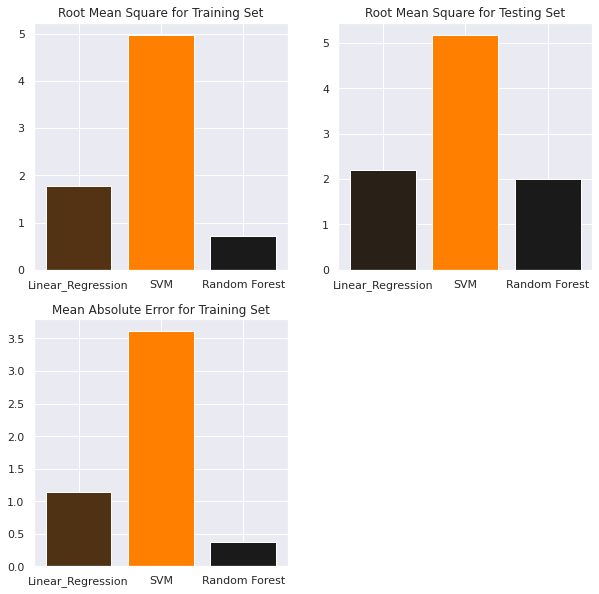

In [57]:
print_results(results)

**Performance order: Random_forest_regressor>Linear Regression>SVM**

In [60]:
import pickle
pickle.dump(Random_forest_regressor, open('student_grade_pred_model.pkl', 'wb'))
model=pickle.load(open('student_grade_pred_model.pkl', 'rb'))